<a href="https://colab.research.google.com/github/hazelliang/Python-Machine-Learning-Project/blob/master/House_Price_HW_4_Hazel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Zillow

## Ingest

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/real_estate_ml/master/data/Zip_Zhvi_SingleFamilyResidence_2018.csv")


## EDA

In [0]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,15508.000,15508.000,15508.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,...,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000
mean,80789.618,47683.566,7754.500,115889.866,116007.379,116123.051,116235.493,116358.920,116501.681,116689.315,...,279359.582,280672.685,282148.749,283446.447,284466.282,285500.200,286717.307,288029.320,289187.510,290106.635
std,31521.485,29008.034,4476.918,85115.825,85264.209,85413.118,85566.676,85744.243,85958.867,86230.630,...,361868.364,361360.576,363102.089,365301.815,366277.876,367095.613,366772.521,364624.171,361143.146,359132.687
min,58196.000,1001.000,1.000,11300.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,...,21700.000,21700.000,22100.000,22200.000,22000.000,21800.000,21700.000,21500.000,21600.000,21900.000
25%,67215.000,22199.000,3877.750,66700.000,66800.000,66925.000,67100.000,67200.000,67300.000,67500.000,...,128300.000,128800.000,129675.000,130300.000,131100.000,131900.000,132900.000,134000.000,135100.000,135600.000
50%,77886.500,45792.500,7754.500,96500.000,96700.000,96750.000,96900.000,96900.000,97000.000,97150.000,...,191100.000,192150.000,193400.000,194600.000,195700.000,196900.000,198100.000,199600.000,201100.000,202150.000
75%,90314.250,74010.250,11631.250,140500.000,140600.000,140600.000,140800.000,141000.000,141100.000,141300.000,...,310750.000,312300.000,314325.000,316100.000,317425.000,318325.000,319800.000,321200.000,322425.000,323900.000
max,753844.000,99901.000,15508.000,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,...,17724700.000,17408900.000,17450500.000,17722800.000,18006700.000,18273800.000,18331900.000,18131900.000,17594900.000,17119600.000


#### Clean Up DataFrame
Rename RegionName to ZipCode and Change Zip Code to String 

In [0]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.000,335400.000,336500.000,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.000,212200.000,212200.000,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.000,500900.000,503100.000,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.000,77300.000,77300.000,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.000,95600.000,95800.000,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [0]:
median_prices = df.median()
#sf_prices = df["City"] == "San Francisco".median()


**Median USA Prices December, 2018**

In [0]:
median_prices.tail()

2018-08   196900.000
2018-09   198100.000
2018-10   199600.000
2018-11   201100.000
2018-12   202150.000
dtype: float64

In [0]:
sf_df = df[df["City"] == "San Francisco"].median()
df_comparison = pd.concat([sf_df,median_prices], axis=1)
df_comparison.columns = ["San Francisco","Median USA"]
df_comparison.tail()


,San Francisco,Median USA
2018-08,1828600.000,196900.000
2018-09,1823200.000,198100.000
2018-10,1823700.000,199600.000
2018-11,1813400.000,201100.000
2018-12,1806000.000,202150.000


### Visualize

In [0]:
!pip uninstall -q -y plotly
!pip install -q plotly
!pip install -q --upgrade cufflinks

    100% |████████████████████████████████| 31.1MB 1.4MB/s 


In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
from plotly.offline import init_notebook_mode
enable_plotly_in_cell()
init_notebook_mode(connected=False)

import cufflinks as cf
cf.go_offline()
df_comparison.iplot(title="Bay Area Median Single Family Home Prices 1996-2018",
                    xTitle="Year",
                    yTitle="Sales Price",
                   #bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

### Cluster on Size Rank and Price


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
columns_to_drop = ['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [0]:
df_numerical.describe()

,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,...,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000,13254.000
mean,7209.201,119843.979,119964.886,120083.967,120200.023,120327.735,120475.887,120670.394,120896.748,121239.875,...,296637.596,298087.355,299639.037,300985.220,302016.350,303017.074,304232.096,305623.276,306889.113,307909.642
std,4415.323,86787.386,86943.535,87100.133,87261.531,87447.615,87671.976,87955.472,88287.690,88726.163,...,324511.156,325590.838,326899.476,327797.537,327909.039,327991.275,328048.196,327854.154,327338.204,327477.529
min,1.000,11400.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,12200.000,12300.000,...,21700.000,21700.000,22100.000,22600.000,23100.000,23700.000,24300.000,24400.000,24400.000,24600.000
25%,3393.250,70000.000,70100.000,70300.000,70400.000,70600.000,70800.000,71000.000,71200.000,71400.000,...,139100.000,139900.000,140725.000,141625.000,142600.000,143300.000,144225.000,145600.000,146700.000,147400.000
50%,6902.500,100750.000,100800.000,100800.000,101000.000,101000.000,101100.000,101200.000,101300.000,101400.000,...,208200.000,209700.000,211050.000,212700.000,213950.000,214900.000,216250.000,217800.000,219100.000,220000.000
75%,10921.750,144500.000,144600.000,144700.000,144800.000,144900.000,144975.000,145200.000,145500.000,145900.000,...,336300.000,337975.000,339900.000,341100.000,342000.000,342975.000,344275.000,345800.000,347750.000,348975.000
max,15508.000,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,3888900.000,3928800.000,...,7494200.000,7529400.000,7534400.000,7494600.000,7417200.000,7395700.000,7265400.000,6917500.000,6692700.000,6671700.000


In [0]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



13254


In [0]:
cluster_df = df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2017-09"]/cluster_df["1996-04"],2)
cluster_df['CityZipCodeAppRatio'] = cluster_df['City'].map(str) + "-" + cluster_df['ZipCode'] + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,cluster,appreciation_ratio,CityZipCodeAppRatio
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.000,335400.000,336500.000,...,1042800,1042900,1044400,1047800,1049700,1048300,1047900,1,3.020,Chicago-60657-3.02
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.000,212200.000,212200.000,...,335900,337000,338300,338400,336900,336000,336500,0,1.520,Katy-77494-1.52
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.000,500900.000,503100.000,...,1323800,1321200,1320700,1319500,1318800,1319700,1323300,1,2.590,Chicago-60614-2.59
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.000,77300.000,77300.000,...,123000,123600,124500,125600,126300,126800,127400,0,1.550,El Paso-79936-1.55
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.000,95600.000,95800.000,...,176900,177300,178000,178500,179300,180200,180700,0,1.760,Katy-77449-1.76


In [0]:
import plotly.offline as py
import plotly.graph_objs as go
enable_plotly_in_cell()
trace1 = go.Scatter3d(
    x=cluster_df["appreciation_ratio"],
    y=cluster_df["1996-04"],
    z=cluster_df["2017-09"],
    mode='markers',
    text=cluster_df["CityZipCodeAppRatio"],
    marker=dict(
        size=12,
        color=cluster_df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="30 Year History USA Real Estate Prices (Clusters Colored)",
    scene = dict(
        xaxis = dict(title='X: Appreciation Ratio'),
        yaxis = dict(title="Y:  1996 Prices"),
        zaxis = dict(title="Z:  2017 Prices")
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

## Modeling





*   Create a time series forecast
*   Find a second model using traditional machine learning (can also find 3rd party data)
*   Nice to have (create a sophisticated prediction):  https://www.kaggle.com/c/house-prices-advanced-regression-techniques



###Time Series Forecast

In [0]:
sf_df = df[df["City"] == "San Francisco"].median()
sf_df.head()

RegionID    97572.000
ZipCode     94118.000
SizeRank     1315.000
1996-04    306900.000
1996-05    307600.000
dtype: float64

In [0]:
sf_df = sf_df.drop(['RegionID', 'ZipCode','SizeRank'])

In [0]:
sf_df.index = pd.to_datetime(sf_df.index)
sf_df.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=273, freq=None)

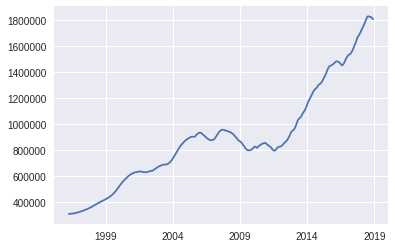

In [0]:
sf_df.plot()

Check stationarity

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



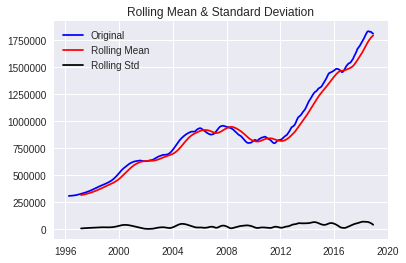

Results of Dickey-Fuller Test:
Test Statistic                  0.145
p-value                         0.969
#Lags Used                     14.000
Number of Observations Used   258.000
Critical Value (1%)            -3.456
Critical Value (5%)            -2.873
Critical Value (10%)           -2.573
dtype: float64


In [0]:
#Not stationarity
#Stationarity assumption is taken in many TS models, so we check stationarity first
test_stationarity(sf_df)

Make the Time Series Stationary

Moving average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()



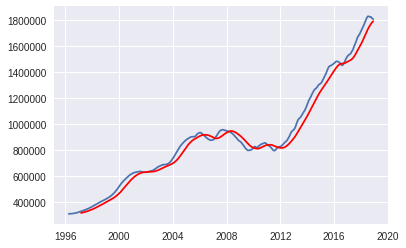

In [0]:
moving_avg = pd.rolling_mean(sf_df,12)
plt.plot(sf_df)
plt.plot(moving_avg, color='red')

In [0]:
ts_moving_avg_diff = sf_df - moving_avg
ts_moving_avg_diff.head(12)

1996-04-01         nan
1996-05-01         nan
1996-06-01         nan
1996-07-01         nan
1996-08-01         nan
1996-09-01         nan
1996-10-01         nan
1996-11-01         nan
1996-12-01         nan
1997-01-01         nan
1997-02-01         nan
1997-03-01   12133.333
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



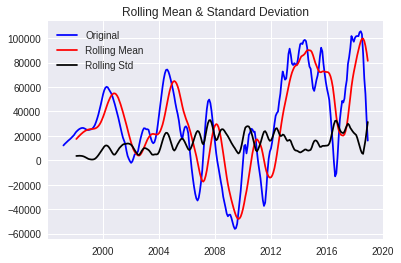

Results of Dickey-Fuller Test:
Test Statistic                 -2.514
p-value                         0.112
#Lags Used                     14.000
Number of Observations Used   247.000
Critical Value (1%)            -3.457
Critical Value (5%)            -2.873
Critical Value (10%)           -2.573
dtype: float64


In [0]:
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

Differencing

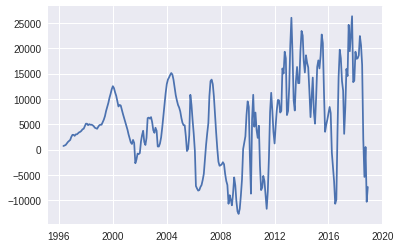

In [0]:
sf_df_diff = sf_df - sf_df.shift()
plt.plot(sf_df_diff)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



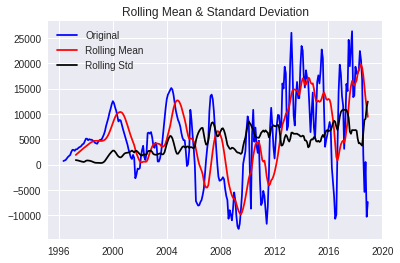

Results of Dickey-Fuller Test:
Test Statistic                 -2.922
p-value                         0.043
#Lags Used                     13.000
Number of Observations Used   258.000
Critical Value (1%)            -3.456
Critical Value (5%)            -2.873
Critical Value (10%)           -2.573
dtype: float64


In [0]:
sf_df_diff.dropna(inplace=True)
test_stationarity(sf_df_diff)

ACF and PACF plots

In [0]:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
lag_acf = acf(sf_df_diff, nlags=20)
lag_pacf = pacf(sf_df_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

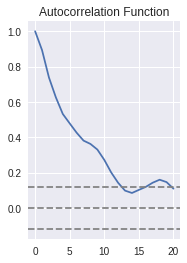

In [0]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sf_df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sf_df_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

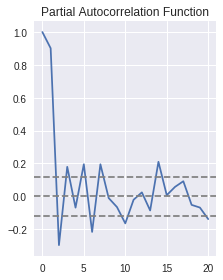

In [0]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sf_df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sf_df_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Model

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

In [0]:
model = ARIMA(sf_df, order=(2,0,12))
model_fit = model.fit(disp=0)
start_index = datetime(1996, 5, 1)
end_index = datetime(2019, 12, 1)
forecast = model_fit.predict(start=start_index, end=end_index)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



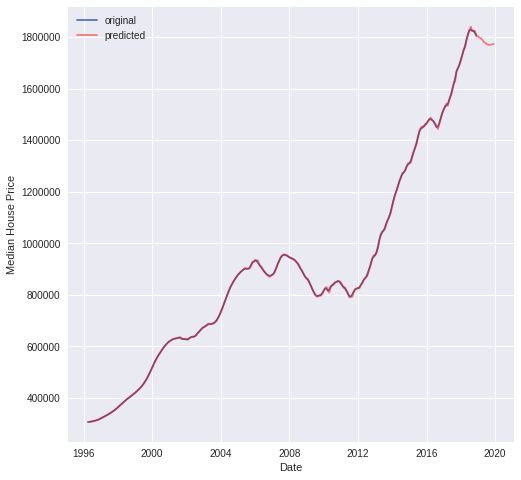

In [0]:
plt.figure(figsize=(8,8))
plt.plot(sf_df,label = "original")
plt.plot(forecast,label = "predicted", color="Red", alpha = 0.5)
plt.xlabel("Date")
plt.ylabel("Median House Price")
plt.legend()
plt.show()

### Traditional ML model

In [0]:
sf = df[df["City"] == "San Francisco"].median()
sf.head()

RegionID    97572.000
ZipCode     94118.000
SizeRank     1315.000
1996-04    306900.000
1996-05    307600.000
dtype: float64

In [0]:
sf = sf.drop(['RegionID', 'ZipCode','SizeRank'])
sf = pd.DataFrame(sf)
sf.columns = ['Price']
sf.index = pd.to_datetime(sf.index)

In [0]:
def create_lags(df, N): 
    for i in range(N): 
     df['Lag' + str(i+1)] = df.Price.shift(i+1) 
    return df 

In [0]:
sf = create_lags(sf,10)

In [0]:
sf= sf.dropna() 

In [0]:
from sklearn.svm import SVR
y = sf.Price.values 
X = sf.iloc[:, 1:].values 

# Train on 70% of the data 
train_idx = int(len(sf) * .5) 

# create train and test data 
X_train, y_train, X_test, y_test = X[:train_idx], y[:train_idx], X[train_idx:], y[:train_idx] 

# fit and predict 
clf = SVR() 
clf.fit(X_train, y_train) 

predictions = clf.predict(X_test) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [0]:
predictions = pd.DataFrame(predictions)
y_train = pd.DataFrame(y_train)

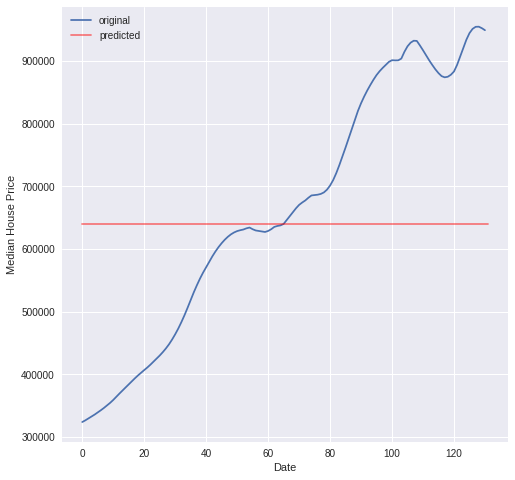

In [0]:
plt.figure(figsize=(8,8))
plt.plot(y_train,label = "original")
plt.plot(predictions,label = "predicted", color="Red", alpha = 0.5)
plt.xlabel("Date")
plt.ylabel("Median House Price")
plt.legend()
plt.show()

## Conclusion


* We make stationarity assumption in many time series models, but due to Trend and Seasonality reason, almost none of real-world time series are stationary. There are two main techniques that we can use to make a time series stationary: Moving average and Differencing.

* Time Series model performed much better than the traditional ML model when our analysis is heavily based on time.

* Based on our prediction, the median house price in San Francisco will decrease in the future.



